<a href="https://colab.research.google.com/github/riteshpatel9041/Cognitive_Computing_UCS420/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

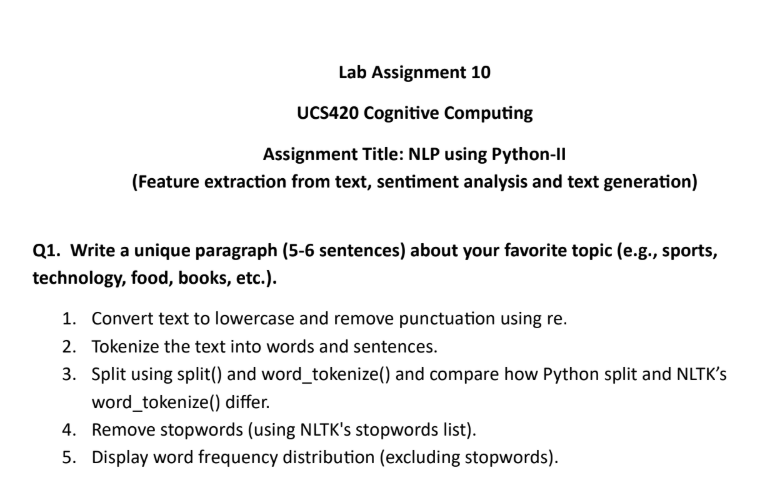

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

text = """Technology has revolutionized the way we live and work.
From smartphones to artificial intelligence, advancements are happening rapidly.
The internet connects people across the globe in seconds.
New tools help businesses become more efficient and innovative.
However, the fast pace of change can also create challenges in privacy and adaptation."""

text_lower = text.lower()
text_clean = re.sub(r'[^\w\s]', '', text_lower)

words_split = text_clean.split()
words_nltk = word_tokenize(text_clean)
sentences = sent_tokenize(text)

print("Python split():", words_split[:10])
print("NLTK word_tokenize():", words_nltk[:10])

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words_nltk if word not in stop_words]

word_freq = Counter(filtered_words)
print("Word Frequency Distribution:")
print(word_freq.most_common())


Python split(): ['technology', 'has', 'revolutionized', 'the', 'way', 'we', 'live', 'and', 'work', 'from']
NLTK word_tokenize(): ['technology', 'has', 'revolutionized', 'the', 'way', 'we', 'live', 'and', 'work', 'from']
Word Frequency Distribution:
[('technology', 1), ('revolutionized', 1), ('way', 1), ('live', 1), ('work', 1), ('smartphones', 1), ('artificial', 1), ('intelligence', 1), ('advancements', 1), ('happening', 1), ('rapidly', 1), ('internet', 1), ('connects', 1), ('people', 1), ('across', 1), ('globe', 1), ('seconds', 1), ('new', 1), ('tools', 1), ('help', 1), ('businesses', 1), ('become', 1), ('efficient', 1), ('innovative', 1), ('however', 1), ('fast', 1), ('pace', 1), ('change', 1), ('also', 1), ('create', 1), ('challenges', 1), ('privacy', 1), ('adaptation', 1)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


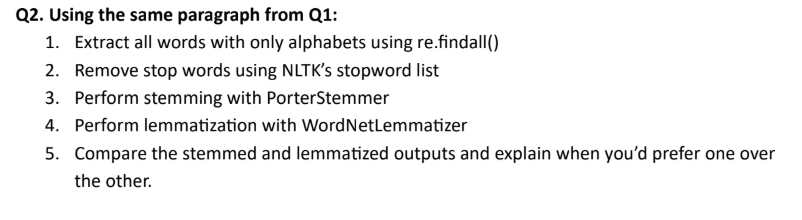

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

text = "Technology has always been a driving force behind human progress. From the invention of the wheel to the development of artificial intelligence, humans have constantly sought to improve their lives through innovation. Today, technology is deeply integrated into our everyday lives, from smartphones to smart homes, creating a world that is more connected than ever before. The pace of technological advancement shows no signs of slowing down, and it holds the promise of transforming industries and society as a whole. We are just beginning to understand its true potential."

text_lower = re.sub(r'[^\w\s]', '', text.lower())

word_tokens = word_tokenize(text_lower)

stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in word_tokens if word not in stop_words]

ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in filtered_tokens]

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_tokens]

print("Filtered Tokens:", filtered_tokens)
print("Stemmed Words:", stemmed_words)
print("Lemmatized Words:", lemmatized_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Filtered Tokens: ['technology', 'always', 'driving', 'force', 'behind', 'human', 'progress', 'invention', 'wheel', 'development', 'artificial', 'intelligence', 'humans', 'constantly', 'sought', 'improve', 'lives', 'innovation', 'today', 'technology', 'deeply', 'integrated', 'everyday', 'lives', 'smartphones', 'smart', 'homes', 'creating', 'world', 'connected', 'ever', 'pace', 'technological', 'advancement', 'shows', 'signs', 'slowing', 'holds', 'promise', 'transforming', 'industries', 'society', 'whole', 'beginning', 'understand', 'true', 'potential']
Stemmed Words: ['technolog', 'alway', 'drive', 'forc', 'behind', 'human', 'progress', 'invent', 'wheel', 'develop', 'artifici', 'intellig', 'human', 'constantli', 'sought', 'improv', 'live', 'innov', 'today', 'technolog', 'deepli', 'integr', 'everyday', 'live', 'smartphon', 'smart', 'home', 'creat', 'world', 'connect', 'ever', 'pace', 'technolog', 'advanc', 'show', 'sign', 'slow', 'hold', 'promis', 'transform', 'industri', 'societi', 'who

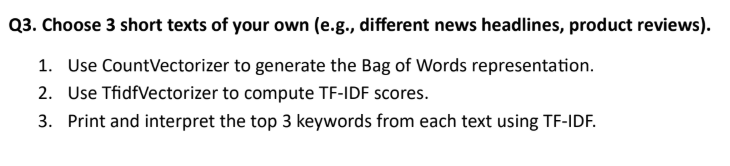

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

texts = [
    "The smartphone has an amazing camera and a long-lasting battery.",
    "This laptop is perfect for gaming, with fast performance and great graphics.",
    "The new smartwatch has a sleek design and many health tracking features."
]

count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(texts)
bag_of_words_array = bag_of_words.toarray()

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
tfidf_array = tfidf_matrix.toarray()

terms = np.array(tfidf_vectorizer.get_feature_names_out())

for i, text in enumerate(texts):
    print(f"Text {i+1}: {text}")
    tfidf_scores = tfidf_array[i]
    sorted_indices = np.argsort(tfidf_scores)[::-1]
    top_3_keywords = terms[sorted_indices][:3]
    print(f"Top 3 Keywords (TF-IDF): {top_3_keywords}\n")


Text 1: The smartphone has an amazing camera and a long-lasting battery.
Top 3 Keywords (TF-IDF): ['smartphone' 'lasting' 'long']

Text 2: This laptop is perfect for gaming, with fast performance and great graphics.
Top 3 Keywords (TF-IDF): ['with' 'this' 'perfect']

Text 3: The new smartwatch has a sleek design and many health tracking features.
Top 3 Keywords (TF-IDF): ['tracking' 'smartwatch' 'many']



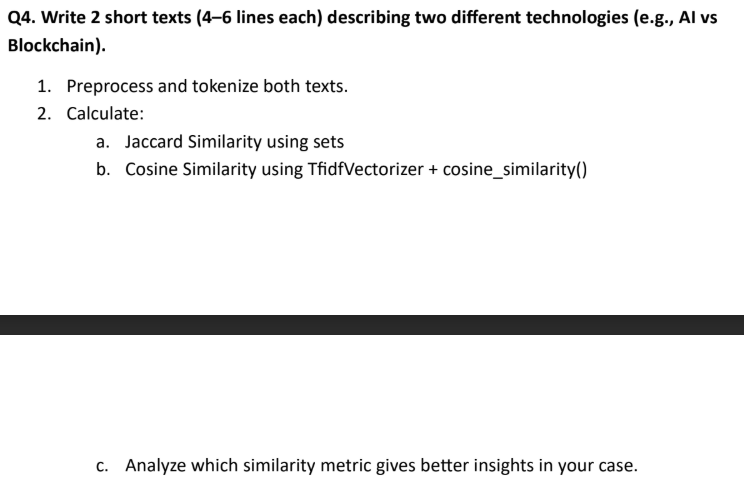

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

text1 = "Artificial Intelligence (AI) is a field of computer science that focuses on creating systems capable of performing tasks that would typically require human intelligence. AI systems learn from data, recognize patterns, and make decisions. Machine learning is a subset of AI that focuses on training algorithms to learn from experience."

text2 = "Blockchain technology is a decentralized digital ledger that records transactions across many computers. It is designed to be secure and transparent, ensuring that data cannot be altered without consensus. Blockchain is most commonly used in cryptocurrency but has applications in various industries."

def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = text.split()
    return set(tokens)

tokens_text1 = preprocess(text1)
tokens_text2 = preprocess(text2)

def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

jaccard_score = jaccard_similarity(tokens_text1, tokens_text2)

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text1, text2])
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

print("Tokens for Text 1:", tokens_text1)
print("Tokens for Text 2:", tokens_text2)
print("Jaccard Similarity:", jaccard_score)
print("Cosine Similarity:", cosine_sim[0][0])


Tokens for Text 1: {'intelligence', 'patterns', 'learning', 'make', 'learn', 'ai', 'subset', 'training', 'performing', 'typically', 'artificial', 'is', 'that', 'creating', 'systems', 'recognize', 'decisions', 'machine', 'to', 'field', 'would', 'data', 'human', 'capable', 'on', 'a', 'require', 'computer', 'and', 'algorithms', 'science', 'from', 'of', 'experience', 'focuses', 'tasks'}
Tokens for Text 2: {'industries', 'many', 'ensuring', 'in', 'most', 'used', 'various', 'it', 'transactions', 'secure', 'ledger', 'cannot', 'blockchain', 'commonly', 'has', 'is', 'that', 'to', 'without', 'across', 'be', 'consensus', 'transparent', 'decentralized', 'data', 'records', 'but', 'cryptocurrency', 'technology', 'a', 'altered', 'designed', 'and', 'digital', 'computers', 'applications'}
Jaccard Similarity: 0.09090909090909091
Cosine Similarity: 0.1303088079190653


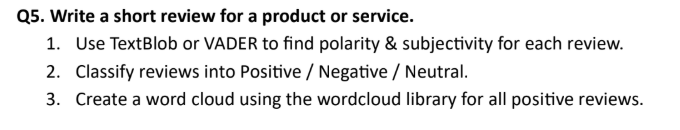

Review: I recently purchased the XYZ Smartwatch, and I am absolutely thrilled with it! The design is sleek, and the functionality is amazing. The battery life is long-lasting, and it's so easy to use. I would highly recommend this to anyone looking for a great smartwatch.
Sentiment: Positive
Polarity: 0.4572222222222222, Subjectivity: 0.6622222222222223

Review: The phone was okay, but nothing special. It performs decently but lacks some of the features I was hoping for.
Sentiment: Positive
Polarity: 0.34126984126984133, Subjectivity: 0.5793650793650794

Review: I don't like this product at all. The build quality is poor, and it malfunctioned after just a few days of use.
Sentiment: Negative
Polarity: -0.30000000000000004, Subjectivity: 0.35

Review: This restaurant offers average food. It's not the best, but the service is decent. I think I’ll return just for the convenience.
Sentiment: Positive
Polarity: 0.2791666666666667, Subjectivity: 0.3416666666666667



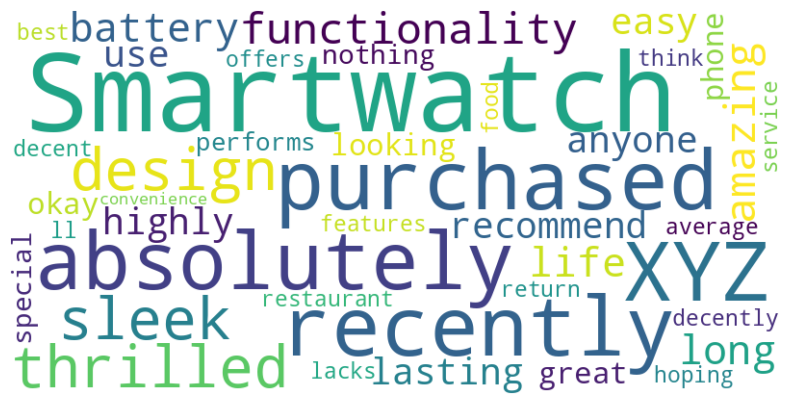

In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt


reviews = [
    "I recently purchased the XYZ Smartwatch, and I am absolutely thrilled with it! The design is sleek, and the functionality is amazing. The battery life is long-lasting, and it's so easy to use. I would highly recommend this to anyone looking for a great smartwatch.",
    "The phone was okay, but nothing special. It performs decently but lacks some of the features I was hoping for.",
    "I don't like this product at all. The build quality is poor, and it malfunctioned after just a few days of use.",
    "This restaurant offers average food. It's not the best, but the service is decent. I think I’ll return just for the convenience."
]


def analyze_sentiment(review):
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    if polarity > 0.1:
        sentiment = "Positive"
    elif polarity < -0.1:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return polarity, subjectivity, sentiment


positive_reviews = []
classified_reviews = []

for review in reviews:
    polarity, subjectivity, sentiment = analyze_sentiment(review)
    classified_reviews.append((review, sentiment, polarity, subjectivity))

    if sentiment == "Positive":
        positive_reviews.append(review)

for review, sentiment, polarity, subjectivity in classified_reviews:
    print(f"Review: {review}\nSentiment: {sentiment}\nPolarity: {polarity}, Subjectivity: {subjectivity}\n")


positive_text = " ".join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


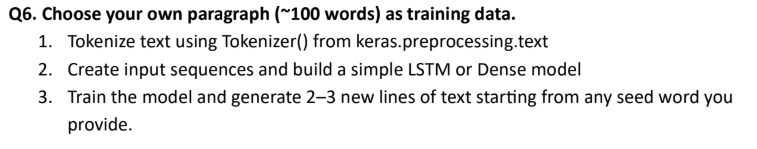

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

text = "Artificial intelligence is transforming the world. It is a technology that allows machines to learn from data and perform tasks that were once exclusive to humans. AI is already being used in industries like healthcare, finance, and entertainment. It has the potential to revolutionize the way we work, live, and communicate. With continuous advancements, AI will continue to improve and create new possibilities."

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences([text])[0]

input_sequences = []
for i in range(1, len(sequences)):
    n_gram_sequence = sequences[:i+1]
    input_sequences.append(n_gram_sequence)

max_sequence_length = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = np.eye(total_words)[y]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length-1))
model.add(LSTM(150, return_sequences=False))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=100, verbose=1)

def generate_text(seed_text, next_words, model, tokenizer, max_sequence_length):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_class = np.argmax(predicted, axis=-1)[0]
        output_word = tokenizer.index_word[predicted_class]
        seed_text += " " + output_word
    return seed_text

seed_text = "AI is"
generated_text = generate_text(seed_text, 3, model, tokenizer, max_sequence_length)
print(generated_text)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.0000e+00 - loss: 3.9310
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.0642 - loss: 3.9200
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.1596 - loss: 3.9066
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.1596 - loss: 3.8891
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.1489 - loss: 3.8540
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.0853 - loss: 3.7855
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.0642 - loss: 3.7805
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.1065 - loss: 3.7146
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.1384 - loss: 3.6995
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.1593 - loss: 3.6179
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.1169 - loss: 3.6232
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accur